<a href="https://colab.research.google.com/github/L1KASA/DL_Course/blob/main/lab1/6409_%D0%A2%D0%B0%D1%85%D0%BC%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%90%D0%A8_%D0%9B%D0%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1

6409 Тахмазова Анжелика

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
#!bash get_datasets.sh

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
#from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST
sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# Подключение библиотек
from keras.datasets import cifar10

# Загрузка данных CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Вывод формы загруженных данных
print('Форма обучающей выборки:', X_train.shape)
print('Форма меток обучающей выборки:', y_train.shape)
print('Форма тестовой выборки:', X_test.shape)
print('Форма меток тестовой выборки:', y_test.shape)


170498071/170498071 [==============================] - 3s 0us/step
Форма обучающей выборки: (50000, 32, 32, 3)
Форма меток обучающей выборки: (50000, 1)
Форма тестовой выборки: (10000, 32, 32, 3)
Форма меток тестовой выборки: (10000, 1)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



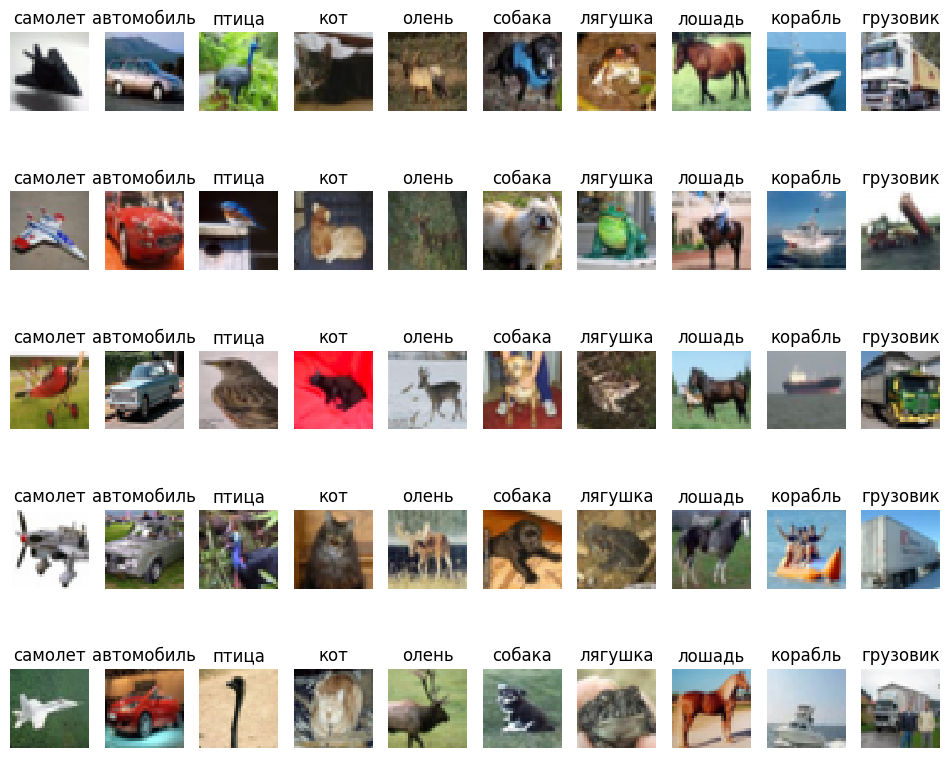

In [4]:
# Названия классов
class_names = ['самолет', 'автомобиль', 'птица', 'кот', 'олень',
               'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# Словарь для хранения индексов изображений для каждого класса
class_indices = {i: [] for i in range(10)}

# Заполнение словаря индексами изображений для каждого класса
for i in range(len(y_train)):
    class_indices[y_train[i][0]].append(i)

plt.figure(figsize=(12, 10))  # Создание новой фигуры для вывода изображений
num_examples_per_class = 5 # Количество примеров из каждого класса

for cls in range(10):
    indices = class_indices[cls]  # Получение индексов изображений для текущего класса
    for i, idx in enumerate(indices[:num_examples_per_class]):
        plt.subplot(num_examples_per_class, 10, i * 10 + cls + 1)  # Добавление подграфика в текущую фигуру
        plt.imshow(X_train[idx])  # Отображение изображения в подграфике
        plt.title(class_names[cls])  # Установка заголовка подграфика как числовой индекс класса
        plt.axis('off')  # Убираем оси координат
plt.show()  # Вывод фигуры с изображениями


1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив.

Пришлось уменьшить выборку, так как ОЗУ постоянно исчерпывался

In [5]:
# Сокращение объема выборки
num_training = 5000
x_train_new = X_train[:num_training]
y_train_new = y_train[:num_training]

num_test = 500
x_test_new = X_test[:num_test]
y_test_new = y_test[:num_test]

In [6]:
# Преобразование изображений в одномерные массивы
x_train_flat = x_train_new.reshape(x_train_new.shape[0], -1)
x_test_flat = x_test_new.reshape(x_test_new.shape[0], -1)

print("Форма обучающей выборки (до преобразования):", x_train_flat.shape)
print("Форма тестовой выборки (после преобразования):", x_test_flat.shape)
print("Форма меток обучающей выборки:", y_train_new.shape)
print("Форма меток тестовой выборки:", y_test_new.shape)

Форма обучающей выборки (до преобразования): (5000, 3072)
Форма тестовой выборки (после преобразования): (500, 3072)
Форма меток обучающей выборки: (5000, 1)
Форма меток тестовой выборки: (500, 1)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке.

Добавим скрипт k_nearest_neighbor

In [7]:
import numpy as np
from tqdm import tqdm

class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just
        memorizing the training data.
        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        """
        Predict labels for test data using this classifier.
        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.
        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(dists, k=k)

    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the
        test data.
        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.
        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]. You should   #
                # not use a loop over dimension, nor use np.linalg.norm().          #
                #####################################################################
                # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

                dists[i][j] = np.sqrt(np.sum((X[i] - self.X_train[j]) ** 2))

                #for j in range(num_train):
                 #   dists[i, j] = np.sqrt(np.sum(np.square(X[i, :] - self.X_train[j, :])))

                # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.
        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            dists[i, :] = np.sqrt(np.sum(np.square(self.X_train - X[i, :]), axis = 1))


            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.
        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy,                #
        # nor use np.linalg.norm().                                             #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        #s1 = np.sum(X ** 2, axis=1)
        #s2 = np.sum(self.X_train ** 2, axis=1)
        #s = s1.reshape((num_test, 1)) + s2 - 2 * X.dot(self.X_train.T)
        #dists = np.sqrt(s)

        dists = np.sqrt(-2 * np.dot(X, self.X_train.T) +
                    np.sum(np.square(self.X_train), axis=1) +
                    np.sum(np.square(X), axis=1)[:, np.newaxis])

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.
        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.
        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            #########################################################################
            # TODO:                                                                 #
            # Use the distance matrix to find the k nearest neighbors of the ith    #
            # testing point, and use self.y_train to find the labels of these       #
            # neighbors. Store these labels in closest_y.                           #
            # Hint: Look up the function numpy.argsort.                             #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # Находим индексы k ближайших соседей для i-го тестового элемента
            knn_ix = dists[i].argsort()[:k]
            # Получаем метки этих ближайших соседей из обучающей выборки
            closest_y = self.y_train[knn_ix]

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            # TODO:                                                                 #
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            values, counts = np.unique(closest_y, return_counts=True)
            y_pred[i] = values[counts == counts.max()].min()

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        return y_pred

In [8]:
classifier = KNearestNeighbor()
classifier.train(x_train_flat, y_train_new)

1.5 Выполните классификацию на тестовой выборке

In [9]:
def accuracy(y_true: np.ndarray, y_pred: np.ndarray):
    return np.sum(y_pred == y_true) / len(y_true)

In [10]:
# Вычисляем расстояния между тестовыми и обучающими данными с использованием двух вложенных циклов
dists_two_loops = classifier.compute_distances_two_loops(x_test_flat)
# Предсказываем метки классов для тестовой выборки на основе расстояний с использованием алгоритма k ближайших соседей (k=5).
y_pred_two_loops = classifier.predict_labels(dists_two_loops, k=5)
print(f"Точность с двумя циклами: {accuracy(y_test_new, y_pred_two_loops)}")

# Вычисляем расстояния с одним циклом
dists_one_loop = classifier.compute_distances_one_loop(x_test_flat)
y_pred_one_loop = classifier.predict_labels(dists_one_loop, k=5)
print(f"Точность с одним циклом: {accuracy(y_test_new, y_pred_one_loop)}")

# Вычисляем расстояния без циклов
dists_no_loops = classifier.compute_distances_no_loops(x_test_flat)
y_pred_no_loops = classifier.predict_labels(dists_no_loops, k=5)
print(f"Точность без циклов: {accuracy(y_test_new, y_pred_no_loops)}")


Точность с двумя циклами: 52.804
Точность с одним циклом: 52.804
Точность без циклов: 55.572


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки.


In [12]:
def visualize_distance_matrix(classifier, X_test, dists):

    print(dists.shape)
    # Визуализация матрицы расстояний
    plt.imshow(dists, interpolation='none')
    plt.xlabel('Обучающая выборка')
    plt.ylabel('Тестовая выборка')
    plt.title('Матрица расстояний')
    #plt.colorbar()
    plt.show()

(500, 5000)


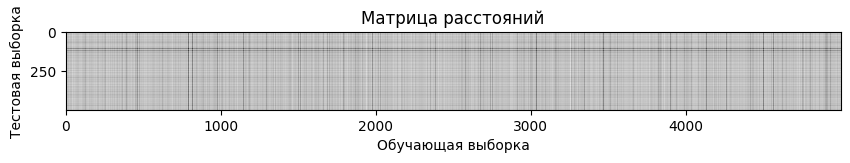

In [13]:
visualize_distance_matrix(classifier, x_test_flat, dists_no_loops)

(500, 5000)


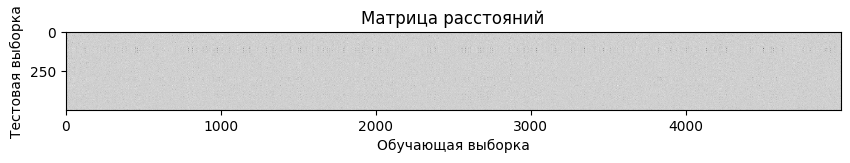

In [14]:
visualize_distance_matrix(classifier, x_test_flat, dists_one_loop)

(500, 5000)


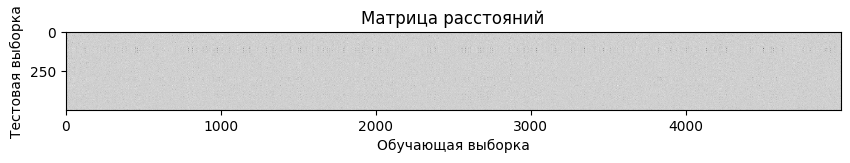

In [15]:
visualize_distance_matrix(classifier, x_test_flat, dists_two_loops)


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [16]:
knn_y_test_predicts = classifier.predict_labels(dists_two_loops)

print(f"Accuracy: {accuracy(knn_y_test_predicts, y_test_new)}")

Accuracy: 52.076


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [17]:
# Задаем список значений числа соседей для kNN
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20, 25, 30, 35, 40, 45, 50]

# Создаем пустой список для хранения точности предсказания для каждого значения k
accuracies = []

# Создаем пустой список для хранения точности предсказания для каждого значения k
knn_accuracy = []

# Проходим по каждому значению k
for k in neighbors:
    # Создаем экземпляр классификатора kNN
    knn_model = KNearestNeighbor()
    # Обучаем классификатор на обучающих данных
    knn_model.train(x_train_flat, y_train_new)
    # Вычисляем расстояния между тестовыми и обучающими данными
    dists = knn_model.compute_distances_no_loops(x_test_flat)
    # Предсказываем метки классов для тестовых данных
    y_test_pred_knn = knn_model.predict_labels(dists, k=k)
    # Вычисляем точность предсказания
    accuracy = np.sum(y_test_pred_knn == knn_y_test_predicts) / num_test
    # Добавляем точность предсказания в список для хранения
    knn_accuracy.append(accuracy)
    # Добавляем точность предсказания в список для хранения
    accuracies.append(accuracy)

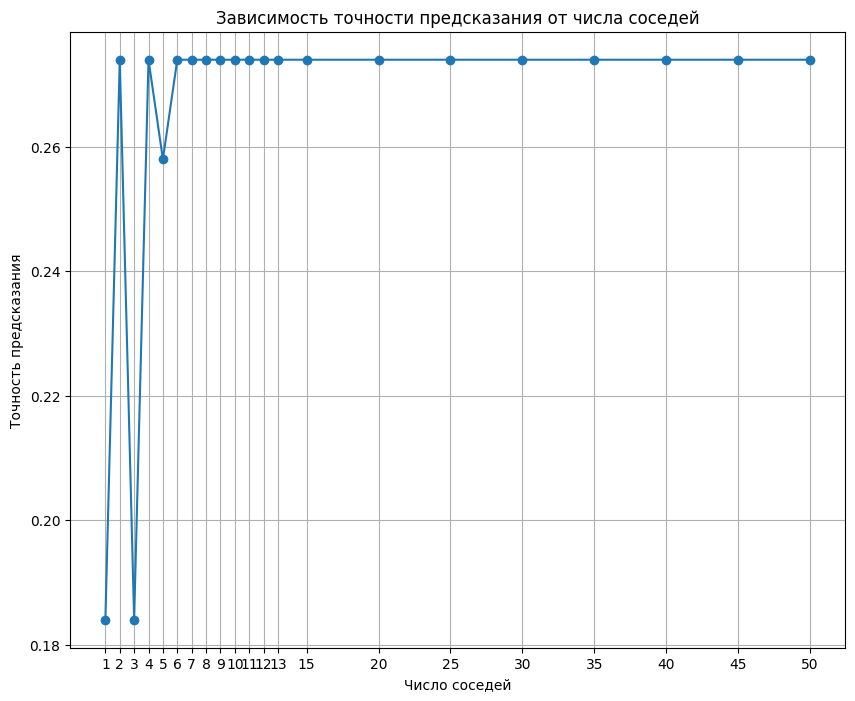

In [18]:
plt.plot(neighbors, knn_accuracy, marker='o')
plt.title('Зависимость точности предсказания от числа соседей')
plt.xlabel('Число соседей')
plt.ylabel('Точность предсказания')
plt.xticks(neighbors)  # Установим значения по оси X как значения из neighbors
plt.grid(True)
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [19]:
# Находим индекс значения k с наибольшей точностью предсказания
best_k_index = np.argmax(accuracies)
# Получаем лучшее значение параметра k на основе индекса
best_k = neighbors[best_k_index]
# Получаем точность предсказания при использовании лучшего значения k
best_accuracy = accuracies[best_k_index]

# Выводим информацию о лучшем значении параметра k и соответствующей точности предсказания
print(f"Лучшее значение параметра k: {best_k}")
print(f"Точность предсказания при использовании лучшего значения k: {best_accuracy}")

Лучшее значение параметра k: 2
Точность предсказания при использовании лучшего значения k: 0.274



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [20]:
def evaluate_accuracy(knn_model, dists, k, y_test_true):
    # Предсказываем метки классов для тестовых данных
    y_test_pred = knn_model.predict_labels(dists, k=k)
    # Оцениваем точность предсказания на тестовых данных
    accuracy = np.sum(y_test_pred == y_test_true) / len(y_test_true)
    return accuracy

def evaluate_knn_model(knn_model, x_test_flat, k, y_test_true, dists_method):
    # Вычисляем расстояния между тестовыми данными и обучающими данными
    if dists_method == "no_loops":
        dists = knn_model.compute_distances_no_loops(x_test_flat)
    elif dists_method == "one_loop":
        dists = knn_model.compute_distances_one_loop(x_test_flat)
    elif dists_method == "two_loops":
        dists = knn_model.compute_distances_two_loops(x_test_flat)

    # Оцениваем точность предсказания на тестовых данных
    accuracy = evaluate_accuracy(knn_model, dists, k, y_test_true)
    return accuracy

# Создаем экземпляр классификатора kNN с выбранным лучшим значением k
best_knn_model = KNearestNeighbor()
best_k = neighbors[best_k_index]  # Получаем выбранное лучшее значение k
best_knn_model.train(x_train_flat, y_train_new)  # Обучаем классификатор на обучающих данных

# Оцениваем точность предсказания на тестовых данных
best_accuracy1 = evaluate_knn_model(best_knn_model, x_test_flat, best_k, knn_y_test_predicts, "no_loops")
best_accuracy2 = evaluate_knn_model(best_knn_model, x_test_flat, best_k, knn_y_test_predicts, "one_loop")
best_accuracy3 = evaluate_knn_model(best_knn_model, x_test_flat, best_k, knn_y_test_predicts, "two_loops")


In [21]:
print(best_accuracy1)
print(best_accuracy2)
print(best_accuracy3)

0.274
0.62
0.62


1.11 Сделайте выводы по результатам 1 части задания.

Когда рассматривается классификатор k-ближайших соседей, становится ясно, что его точность зависит от выбора количества соседей. Увеличение числа соседей приводит к увеличению точности классификации, но при этом увеличивается и время обучения модели. Более того, при использовании большого количества соседей возрастает риск того, что модель может переобучиться, поэтому очень важно выбирать оптимальное значение параметра k.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [11]:
#from sklearn.model_selection import train_test_split
# Загрузка данных CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Разделение данных на обучающую, тестовую и валидационную выборки
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Размеры выборок
num_train = 49000
num_val = 1000
num_test = 8000

# Разделение выборок
x_train, x_val, x_test = x_train[:num_train], x_train[num_train:num_train+num_val], x_test[:num_test]
y_train, y_val, y_test = y_train[:num_train], y_train[num_train:num_train+num_val], y_test[:num_test]

# Преобразование изображений в одномерные массивы
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Вывод размеров выборок
print("Форма обучающей выборки (после преобразования):", x_train_flat.shape)
print("Форма валидационной выборки (после преобразования):", x_val_flat.shape)
print("Форма тестовой выборки (после преобразования):", x_test_flat.shape)
print("Форма меток обучающей выборки:", y_train.shape)
print("Форма меток валидационной выборки:", y_val.shape)
print("Форма меток тестовой выборки:", y_test.shape)

Форма обучающей выборки (после преобразования): (49000, 3072)
Форма валидационной выборки (после преобразования): (1000, 3072)
Форма тестовой выборки (после преобразования): (8000, 3072)
Форма меток обучающей выборки: (49000, 1)
Форма меток валидационной выборки: (1000, 1)
Форма меток тестовой выборки: (8000, 1)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

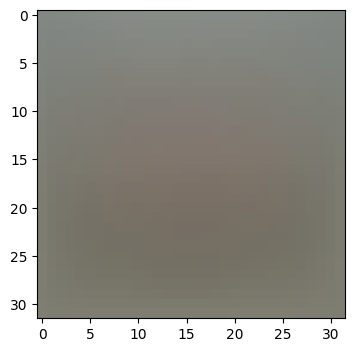

Форма обучающей выборки (после обработки): (49000, 3073)
Форма валидационной выборки (после обработки): (1000, 3073)
Форма тестовой выборки (после обработки): (8000, 3073)


In [12]:
# Вычисляем среднее изображение по обучающей выборке
mean_image = np.mean(x_train_flat, axis=0)

# Визуализируем среднее изображение
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((32, 32, 3)).astype('uint8'))
plt.show()
# Преобразуем среднее изображение к типу uint8
mean_image = mean_image.astype('uint8')

# Проводим предварительную обработку данных: вычитаем среднее изображение из каждого изображения
x_train_flat -= mean_image
x_val_flat -= mean_image
x_test_flat -= mean_image

# Добавляем дополнительную размерность и заполняем ее единицами
x_train_flat = np.hstack([x_train_flat, np.ones((x_train_flat.shape[0], 1))])
x_val_flat = np.hstack([x_val_flat, np.ones((x_val_flat.shape[0], 1))])
x_test_flat = np.hstack([x_test_flat, np.ones((x_test_flat.shape[0], 1))])

# Выводим размеры выборок после предварительной обработки
print("Форма обучающей выборки (после обработки):", x_train_flat.shape)
print("Форма валидационной выборки (после обработки):", x_val_flat.shape)
print("Форма тестовой выборки (после обработки):", x_test_flat.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



Добавим скрипт linear_svm

In [13]:
import numpy as np
from random import shuffle


def svm_loss_naive(W, X, y, reg):
    """
    Structured SVM loss function, naive implementation (with loops).
    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.
    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength
    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    dW = np.zeros(W.shape) # initialize the gradient as zero

    # compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = X.shape[0]

    loss = 0.0
    for i in range(1, num_train):
        scores = X[i].dot(W)
        correct_class_score = scores[y[i]]
        for j in range(num_classes):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1 # note delta = 1
            if margin > 0:
                loss = loss + margin


    # Right now the loss is a sum over all training examples, but we want it
    # to be an average instead so we divide by num_train.
    loss = loss / num_train

    # Add regularization to the loss.
    loss = loss + 0.5*reg * np.sum(W * W)

    #############################################################################
    # TODO:                                                                     #
    # Compute the gradient of the loss function and store it dW.                #
    # Rather than first computing the loss and then computing the derivative,   #
    # it may be simpler to compute the derivative at the same time that the     #
    # loss is being computed. As a result you may need to modify some of the    #
    # code above to compute the gradient.                                       #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    dW = dW + W * reg

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW



def svm_loss_vectorized(W, X, y, reg):
    """
    Structured SVM loss function, vectorized implementation.
    Inputs and outputs are the same as svm_loss_naive.
    """
    loss = 0.0
    dW = np.zeros(W.shape) # initialize the gradient as zero

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the structured SVM loss, storing the    #
    # result in loss.                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # Вычисляем оценки классов для всех изображений
    scores = np.dot(X, W)
    # Получаем количество изображений в обучающем наборе
    num_train = X.shape[0]
    # Создаем список номеров изображений
    rows = range(num_train)
    # Получаем оценку правильного класса для каждого изображения
    correct_class_score = scores[rows[1], y]
    # Вычисляем отступы
    margins = np.maximum(0, scores - np.reshape(correct_class_score, [num_train, 1]) + 1)
    # Устанавливаем отступы для правильных классов в 0
    margins[rows[1], y] = 0
    # Вычисляем потери
    loss = np.sum(margins)
    # Преобразуем потери в среднее значение
    loss /= num_train
    # Добавляем регуляризацию к потерям
    loss += 0.5 * reg * np.sum(W * W)


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the gradient for the structured SVM     #
    # loss, storing the result in dW.                                           #
    #                                                                           #
    # Hint: Instead of computing the gradient from scratch, it may be easier    #
    # to reuse some of the intermediate values that you used to compute the     #
    # loss.                                                                     #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # Устанавливаем значения отступов больше нуля в 1
    margins[margins > 0] = 1.0
    # Вычисляем сумму отступов для каждого изображения
    row_sum = np.sum(margins, axis=1)
    # Для правильных меток классов вычитаем сумму отступов из соответствующих элементов
    margins[np.arange(num_train), y] = -row_sum
    # Обновляем градиент
    dW = dW + np.dot(X.T, margins)/num_train + reg * W



    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW

In [14]:
#W = np.random.randn(3073, 10) * 0.0001
#from scripts.classifiers.linear_svm import svm_loss_naive
W = np.random.randn(3073, 10) * 0.0001

loss, grad = svm_loss_naive(W, x_val_flat, y_val, 0.000005)
print('loss: %f' % (loss.item(), ))  # Извлечение скалярного значения из тензора

loss: 10.727408



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

Добавляем скрипт gradient_check.py

In [15]:
from __future__ import print_function
from builtins import range
from past.builtins import xrange

import numpy as np
from random import randrange

def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
    """
    a naive implementation of numerical gradient of f at x
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """

    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print(ix, grad[ix])
        it.iternext() # step to next dimension

    return grad


def eval_numerical_gradient_array(f, x, df, h=1e-5):
    """
    Evaluate a numeric gradient for a function that accepts a numpy
    array and returns a numpy array.
    """
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x).copy()
        x[ix] = oldval - h
        neg = f(x).copy()
        x[ix] = oldval

        grad[ix] = np.sum((pos - neg) * df) / (2 * h)
        it.iternext()
    return grad


def eval_numerical_gradient_blobs(f, inputs, output, h=1e-5):
    """
    Compute numeric gradients for a function that operates on input
    and output blobs.

    We assume that f accepts several input blobs as arguments, followed by a
    blob where outputs will be written. For example, f might be called like:

    f(x, w, out)

    where x and w are input Blobs, and the result of f will be written to out.

    Inputs:
    - f: function
    - inputs: tuple of input blobs
    - output: output blob
    - h: step size
    """
    numeric_diffs = []
    for input_blob in inputs:
        diff = np.zeros_like(input_blob.diffs)
        it = np.nditer(input_blob.vals, flags=['multi_index'],
                       op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            orig = input_blob.vals[idx]

            input_blob.vals[idx] = orig + h
            f(*(inputs + (output,)))
            pos = np.copy(output.vals)
            input_blob.vals[idx] = orig - h
            f(*(inputs + (output,)))
            neg = np.copy(output.vals)
            input_blob.vals[idx] = orig

            diff[idx] = np.sum((pos - neg) * output.diffs) / (2.0 * h)

            it.iternext()
        numeric_diffs.append(diff)
    return numeric_diffs


def eval_numerical_gradient_net(net, inputs, output, h=1e-5):
    return eval_numerical_gradient_blobs(lambda *args: net.forward(),
                inputs, output, h=h)


def grad_check_sparse(f, x, analytic_grad, num_checks=10, h=1e-5):
    """
    sample a few random elements and only return numerical
    in this dimensions.
    """

    for i in range(num_checks):
        ix = tuple([randrange(m) for m in x.shape])

        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evaluate f(x + h)
        x[ix] = oldval - h # increment by h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # reset

        grad_numerical = (fxph - fxmh) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = (abs(grad_numerical - grad_analytic) /
                    (abs(grad_numerical) + abs(grad_analytic)))
        print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))

In [16]:
loss, grad = svm_loss_naive(W, x_val_flat, y_val, 0.0)

f = lambda w: svm_loss_naive(w, x_val_flat, y_val, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, x_val_flat, y_val, 5e1)
f = lambda w: svm_loss_naive(w, x_val_flat, y_val, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

<ipython-input-15-2b0e5e27ec0c>:128: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))


numerical: 52.460000 analytic: 0.000000, relative error: 1.000000e+00
numerical: 28.633797 analytic: 0.000000, relative error: 1.000000e+00
numerical: -96.143000 analytic: 0.000000, relative error: 1.000000e+00
numerical: 67.232727 analytic: 0.000000, relative error: 1.000000e+00
numerical: -96.882249 analytic: 0.000000, relative error: 1.000000e+00
numerical: -25.767000 analytic: 0.000000, relative error: 1.000000e+00
numerical: 78.970000 analytic: 0.000000, relative error: 1.000000e+00
numerical: -22.694727 analytic: 0.000000, relative error: 1.000000e+00
numerical: -88.009249 analytic: 0.000000, relative error: 1.000000e+00
numerical: -13.489000 analytic: 0.000000, relative error: 1.000000e+00
numerical: -79.358042 analytic: -0.004294, relative error: 9.998918e-01
numerical: 10.680276 analytic: -0.001325, relative error: 1.000000e+00
numerical: 72.472800 analytic: -0.005200, relative error: 1.000000e+00
numerical: 85.981148 analytic: 0.006148, relative error: 9.998570e-01
numerical:

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [28]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, x_val_flat, y_val, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, x_val_flat, y_val, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.196234s
Vectorized loss and gradient: computed in 0.041506s
difference: 195291.164096


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

Добавим скрипт linear_classifier

In [29]:
from __future__ import annotations

from typing import TYPE_CHECKING

import numpy as np
from tqdm import tqdm

if TYPE_CHECKING:
    from typing import List


class LinearClassifier(object):

    def __init__(self):
        self.W = None

    def train(
            self,
            X: np.ndarray,
            y: np.ndarray,
            learning_rate: float = 1e-3,
            reg: float = 1e-5,
            num_iters: int = 100,
            batch_size: int = 200,
            verbose: bool = False,
    ) -> List[float]:
        """
        Train this linear classifier using stochastic gradient descent.
        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.
        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        num_train, dim = X.shape
        num_classes = np.max(y) + 1  # assume y takes values 0...K-1 where K is number of classes
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in tqdm(range(num_iters)):
            X_batch = None
            y_batch = None

            #########################################################################
            # TODO:                                                                 #
            # Sample batch_size elements from the training data and their           #
            # corresponding labels to use in this round of gradient descent.        #
            # Store the data in X_batch and their corresponding labels in           #
            # y_batch; after sampling X_batch should have shape (batch_size, dim)   #
            # and y_batch should have shape (batch_size,)                           #
            #                                                                       #
            # Hint: Use np.random.choice to generate indices. Sampling with         #
            # replacement is faster than sampling without replacement.              #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            sample_index = np.random.choice(num_train, batch_size)
            X_batch = X[sample_index]
            y_batch = y[sample_index]

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            #                       END OF YOUR CODE                                #
            #########################################################################

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # perform parameter update
            #########################################################################
            # TODO:                                                                 #
            # Update the weights using the gradient and the learning rate.          #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            self.W -= grad * learning_rate

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            #                       END OF YOUR CODE                                #
            #########################################################################

            if verbose and it % 100 == 0:
                print("iteration %d / %d: loss %f" % (it, num_iters, loss))

        return loss_history

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.
        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        y_pred = np.zeros(X.shape[1])
        ###########################################################################
        # TODO:                                                                   #
        # Implement this method. Store the predicted labels in y_pred.            #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        y_pred = np.argmax(X.dot(self.W), axis=1)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ###########################################################################
        #                           END OF YOUR CODE                              #
        ###########################################################################
        return y_pred

    def loss(self, X_batch, y_batch, reg):
        """
        Compute the loss function and its derivative.
        Subclasses will override this.
        Inputs:
        - X_batch: A numpy array of shape (N, D) containing a minibatch of N
          data points; each point has dimension D.
        - y_batch: A numpy array of shape (N,) containing labels for the minibatch.
        - reg: (float) regularization strength.
        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.W; an array of the same shape as W
        """
        pass


class LinearSVM(LinearClassifier):
    """ A subclass that uses the Multiclass SVM loss function """

    def loss(self, X_batch, y_batch, reg):
        return svm_loss_vectorized(self.W, X_batch, y_batch, reg)


class Softmax(LinearClassifier):
    """ A subclass that uses the Softmax + Cross-entropy loss function """

    def loss(self, X_batch, y_batch, reg):
        return softmax_loss_vectorized(self.W, X_batch, y_batch, reg)

In [32]:
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(x_train_flat, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

  0%|          | 5/1500 [00:00<00:34, 43.41it/s]

iteration 0 / 1500: loss 418.428824


  7%|▋         | 109/1500 [00:02<00:22, 62.73it/s]

iteration 100 / 1500: loss 15183.381840


 14%|█▎        | 204/1500 [00:03<00:24, 53.55it/s]

iteration 200 / 1500: loss 61319.483934


 21%|██        | 310/1500 [00:05<00:17, 68.68it/s]

iteration 300 / 1500: loss 97938.141943


 27%|██▋       | 409/1500 [00:06<00:16, 66.16it/s]

iteration 400 / 1500: loss 138963.590706


 34%|███▍      | 514/1500 [00:08<00:13, 70.48it/s]

iteration 500 / 1500: loss 165997.248566


 40%|████      | 605/1500 [00:09<00:13, 67.11it/s]

iteration 600 / 1500: loss 193863.797615


 47%|████▋     | 710/1500 [00:12<00:17, 44.42it/s]

iteration 700 / 1500: loss 220841.549194


 54%|█████▍    | 811/1500 [00:14<00:11, 58.80it/s]

iteration 800 / 1500: loss 237710.661033


 61%|██████    | 912/1500 [00:15<00:09, 61.61it/s]

iteration 900 / 1500: loss 264100.025864


 68%|██████▊   | 1017/1500 [00:17<00:06, 70.26it/s]

iteration 1000 / 1500: loss 301226.621274


 74%|███████▍  | 1107/1500 [00:18<00:06, 62.82it/s]

iteration 1100 / 1500: loss 284019.423888


 81%|████████  | 1209/1500 [00:20<00:04, 66.19it/s]

iteration 1200 / 1500: loss 289604.760263


 87%|████████▋ | 1309/1500 [00:22<00:03, 56.98it/s]

iteration 1300 / 1500: loss 315840.226567


 94%|█████████▎| 1406/1500 [00:25<00:02, 33.86it/s]

iteration 1400 / 1500: loss 316174.221991


100%|██████████| 1500/1500 [00:26<00:00, 57.16it/s]

That took 26.266578s


In [33]:
y_train_pred = svm.predict(x_train_flat)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(x_val_flat)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.100021
validation accuracy: 0.099045


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [35]:
# Инициализируем переменные для хранения лучшей точности и соответствующих значений скорости обучения и регуляризации
best_accuracy = 0
best_lr = 0
best_reg = 0

# Устанавливаем seed для воспроизводимости результатов
np.random.seed(42)

# Проходим по всем комбинациям скорости обучения и силы регуляризации
for lr in learning_rates:
    for rs in regularization_strengths:
        # Создаем SVM модель и обучаем ее на обучающей выборке
        svm = LinearSVM()
        svm.train(x_train_flat, y_train, learning_rate=lr, reg=rs,
                      num_iters=1500, verbose=False)
        # Предсказываем метки классов для валидационной выборки
        y_val_pred = svm.predict(x_val_flat)

        # Обновляем лучшую точность и соответствующие значения скорости обучения и регуляризации,
        # если текущая точность лучше
        if ((np.mean(y_val == y_val_pred)) > best_accuracy):
            best_lr = lr
            best_reg = rs
            best_accuracy = (np.mean(y_val == y_val_pred))
        # Выводим текущую точность для данной комбинации параметров
        print(f'Lr: {lr}, reg: {rs}, accuracy: {(np.mean(y_val == y_val_pred))}')

# Выводим лучший результат: точность, скорость обучения и силу регуляризации
print(f'Лучший результат: Точность: {best_accuracy}. Lr: {best_lr} , reg: {best_reg}')


100%|██████████| 1500/1500 [00:10<00:00, 140.58it/s]


Lr: 1e-07, reg: 25000.0, accuracy: 0.104458


100%|██████████| 1500/1500 [00:09<00:00, 151.90it/s]


Lr: 1e-07, reg: 50000.0, accuracy: 0.082478


100%|██████████| 1500/1500 [00:08<00:00, 168.29it/s]


Lr: 5e-05, reg: 25000.0, accuracy: 0.087


 56%|█████▋    | 846/1500 [00:06<00:03, 173.48it/s]<ipython-input-24-ee53017471e5>:88: RuntimeWarning: overflow encountered in scalar multiply
  loss += 0.5 * reg * np.sum(W * W)
 58%|█████▊    | 864/1500 [00:07<00:03, 166.27it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 59%|█████▊    | 881/1500 [00:07<00:03, 159.09it/s]<ipython-input-24-ee53017471e5>:88: RuntimeWarning: overflow encountered in multiply
  loss += 0.5 * reg * np.sum(W * W)
100%|██████████| 1500/1500 [00:10<00:00, 137.41it/s]

Lr: 5e-05, reg: 50000.0, accuracy: 0.107469
Best result: Accuracy: 0.107469. Lr: 5e-05 , reg: 50000.0


In [37]:
svm = LinearSVM()
svm.train(x_train_flat, y_train, learning_rate=best_lr, reg=best_reg,
              num_iters=1500, verbose=False)
y_test_pred = svm.predict(x_test_flat)

y_test_pred = svm.predict(x_test_flat)
print(f'Точность на тестовой выборке: %f' % (np.mean(y_test == y_test_pred), ))

 57%|█████▋    | 856/1500 [00:10<00:04, 156.77it/s]<ipython-input-24-ee53017471e5>:88: RuntimeWarning: overflow encountered in scalar multiply
  loss += 0.5 * reg * np.sum(W * W)
 58%|█████▊    | 874/1500 [00:10<00:03, 160.05it/s]<ipython-input-24-ee53017471e5>:88: RuntimeWarning: overflow encountered in multiply
  loss += 0.5 * reg * np.sum(W * W)
100%|██████████| 1500/1500 [00:14<00:00, 104.16it/s]


Точность на тестовой выборке: 0.099356


2.9 Сделайте выводы по второй части задания

Реализация KNN продемонстрировала более высокую точность и скорость обучения по сравнению с SVM. Однако, для SVM критически важен выбор оптимального значения параметра регуляризации, который может существенно повлиять на результаты обучения и обобщение модели.